In [ ]:
! apt install mecab libmecab-dev mecab-ipadic-utf8
! pip install unidic-lite

! wget https://nlp100.github.io/data/neko.txt

!mecab ./neko.txt -o ./neko.txt.mecab

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils
0 upgraded, 6 newly installed, 0 to remove and 21 not upgraded.
Need to get 7,373 kB of archives.
After this operation, 60.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libmecab2 amd64 0.996-10build1 [233 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libmecab-dev amd64 0.996-10build1 [285 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 mecab-utils amd64 0.996-10build1 [4,912 B]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 mecab-ipadic all 2.7.0-20070801+main-2.1 [

In [ ]:
!head -15 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


30.形態素解析結果の読み込み

メモ

・リストの変数名は、複数形にするなど、わかりやすくする。

・変数名は誰が見ても分かるものに

In [ ]:
result = []
sentence = []
 
with open("neko.txt.mecab") as f:
    for line in f:
        if line != 'EOS\n':
            list1 = line.split("\t") # 表層系とそれ以外に分割
            if len(list1) == 2:
                list2 = list1[1].split(",")
                # mecabの出力フォーマットは、左から 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音 となっている
                sentence.append({"surface": list1[0],
                                 "base": list2[6],
                                 "pos": list2[0],
                                 "pos1":list2[1]
                                 })
        else:
            result.append(sentence)
            sentence = []

result

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}],
 [{'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
  {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
  {'surf

31. 動詞

In [ ]:
verb = set() # set型で重複をなくす
for sentence in result:
    for dic in sentence:
        if dic["pos"] == "動詞": # 品詞が動詞の場合
            verb.add(dic["surface"]) # 表層系を追加

print(verb)

{'つかん', '潰そ', '附し', '奏し', 'やき', '暮す', '居ら', '活け', 'あつめ', '突っつい', '転げ落ち', '貰え', '病み', '横切っ', '錬', '思う', '解い', '蹴', '潜ら', '気に入り', '祭り', '転がり', 'しめ', '働け', 'かえ', '仰向き', '踞る', '称する', '蹶', '縫いつけ', '売れ残っ', 'はいる', '積み込ま', '滑り込む', 'やり直す', 'ならべ', '動く', '浮く', 'あ', 'もうし', 'あるけ', '切らし', 'もぐり込ん', '転じ', 'ねじ伏せる', '寝れ', '撚っ', '洩', '貪る', '着く', '罹っ', '過ぎ去っ', '問い掛ける', '被る', '踏み', '連れ添う', '張れれ', '称せ', 'まし', '点じ', '磨る', 'はいっ', 'おどり', '見向き', '答え', '遊ん', '明か', '叩き上げ', '見せびらかし', '振り翳し', '踏み出せ', '困ら', '呼ぶ', '乗ら', '恐れ', '曲がり', '入る', '計り', '廻す', '書き散らし', '来たし', '云っ', '障る', '初める', '買い', '拭く', '流す', '係わる', '隠す', 'したがっ', 'まがっ', '鳴らさ', '残っ', '飛び越える', '習う', '差し支え', 'さしゃ', '動かす', '注ぎ', '申し聞け', 'もがい', '伝わっ', '泳い', '縛せ', '入れ違い', '行う', 'ふう', '描き', '関する', '奉っ', '明け', '更け', '招い', '読む', '敷い', '放と', 'しゃべる', 'かかえ', '曲がろ', '知る', '択ぶ', 'いらっ', 'やって退け', 'しらべ', '除い', 'もらえ', 'かよう', '離さ', '誘わ', '騒ぐ', '放り出し', 'そり返っ', '受合っ', '参る', '当っ', '縛ら', '靡く', '笑い', '忌み嫌っ', '頼み', '参らせる', '畳む', '働か', 'いただく', '切り刻ん', 'つぐ', '担い', '待ち構え', '突き戻す', '擦り

32. 動詞の基本形

In [ ]:
verb_base = set() # set型で重複をなくす
for sentence in result:
    for dic in sentence:
        if dic["pos"] == "動詞": # 品詞が動詞の場合
            verb_base.add(dic["base"]) # 基本形を追加

print(verb_base)

{'変じる', '突っつく', '通じる', '帰す', '任じる', '暮す', '糺す', '思う', '踞る', '称する', '植え付ける', 'はいる', '滑り込む', 'ねぶる', 'やり直す', '読み直す', 'つくばう', '動く', '磨り潰す', '浮く', 'からまる', '生む', 'ねじ伏せる', '悩む', '費やす', '貪る', '着く', '曲がる', '問い掛ける', '被る', '連れ添う', '変える', '若く', '磨る', '縛る', '切り刻む', '生かす', '呼ぶ', '奉じる', 'ほる', '存じる', '入る', '廻す', '書き立てる', '促す', '障る', '初める', '溺れる', '流す', '隠す', '拭く', '係わる', '投げ出す', '投ずる', '飛び越える', '習う', '動かす', '行う', 'ふう', '関する', 'はみ出す', '読む', 'しゃべる', '伺える', 'やむをえる', 'あびる', '懸かる', '知る', '択ぶ', 'かよう', '騒ぐ', '参る', '止める', '靡く', '買える', '参らせる', '切り開く', '聞き及ぶ', '畳む', 'いただく', 'たくる', 'つぐ', 'さする', '突き戻す', '逃げ惑う', 'してやる', '返る', '舞う', '織る', 'いらう', 'つぶやく', '追い込む', '溢れる', 'ねむる', '流れ出す', '染む', 'かわす', '違う', 'おっしゃる', '引掻く', 'はする', '打ち落す', '話しかける', '断る', '生やす', '見捨てる', '蒔く', '成す', '填める', 'こめる', '舐める', '追払う', '籠る', 'ねだる', 'かぎる', '滅入る', '借りる', '撲る', '考え込む', '迎える', '聞こえる', '増す', '生す', '除く', '飲める', '召す', 'のむ', 'たてる', '終える', '覚る', '打ち解ける', '尖る', '滑らす', '削る', '捻り出す', '志す', '拗じる', '欠ける', '取り掛る', '損する', 'なす', '寄り添う', '続く', '太れる', 

33. 「AのB」

In [ ]:
noun = set() # set型で重複をなくす
for sentence in result:
    for i in range(len(sentence)-2):
        if sentence[i]["pos"] == "名詞" and sentence[i+1]["surface"] == "の" and sentence[i+2]["pos"] == "名詞":
            noun.add(sentence[i]["surface"] + sentence[i+1]["surface"] + sentence[i+2]["surface"])

print(noun)

{'人さし指の先', '御存じの癖', '一騎当千の豪傑', '薄紫の衣服', '君の意', '町内のもの', '先生の不思議', '猫の癖', '自身の要求', '三角の中心', '忍びの術', '様の周り', 'どこの烏', '本意の気味', '以外の活動', '私の方', '胸のうち', '平の宗', '校の生徒', '主人の自信', '敵の策略', '吾輩の心眼', '筆の穂', '襖の音', '大学の貸費', 'いそのビール', '未来の細君', '別の本', '碗の茶', '太平の空気', '種類のもの', '玄関の障子', '自分の身の上', '煙の行末', 'かたのよう', '二の所', '骨の左右', '形体の遺伝', '何等の反応', '洋服の方', '主人の身の上', '吾輩の咽喉', '腕まくりの代り', '夜具のなか', '幼少の時', '館の境', '人の金', '平等の水彩', '猫の忠告', '不振の際', '吾輩の眼球', '女の事', '僕の有望', '近来の珍', '親子の愛', '皿のカステラ', '不審の体', '以前の民', '医者の薬', '監督の家', '約束の十', '木の附近', '種類の運動', '裏の池', '酒の相手', '野暮の方', '車屋の方', '本堂の裏手', '下士官の健康', '吾輩の主人', '私の学校', '君の創作', '三つの行路', '教師の家', '自分の損', '明瞭の答', '談話の火の手', '吾輩の後ろ', '家主の伝兵衛', '鳩の事', '普通の人類', '禿頭の音', '最後の失望', '人の苦', '膝のあたり', '吾輩の襟', '天体の運行', '隅田川の底', '人間の生涯', '流の考', '人間の運命', '家の二', '時代の羽織', '吾輩の輪廓', '期の後', '主人の口', '顔の権衡', '書物の上', '胃の人', '活版の手紙', '肝心の母親', '行李の中', '人の世の中', '倫理の先生', '僕の事', '胃弱の標準', '発見の端緒', '苦しみの程度', '論文の稿', '士の足音', '南蛮の材料', '垂れの上', '荒磯の千鳥', 'つきの狂人', '臘の英雄', '蝦夷の男', '老若の別', '女の頸', '日本の墨'

34. 名詞の連接

In [ ]:
nouns = set() # set型で重複をなくす
for sentence in result:
    noun = ''
    cnt= 0
    for dic in sentence:
        if dic["pos"] == "名詞":
            noun = ''.join([noun, dic["surface"]])
            cnt += 1
        elif cnt >= 2:
            nouns.add(noun)
            noun = ''
            cnt = 0
        else:
            noun = ''
            cnt = 0

print(nouns)

{'四つ足', '藪睨み', '羽織全盛', '一大珍報', '変怪', 'あなた方', '寒月君用心', '落雲館', '夫婦連', '古往今来一匹', '時先生', '本因坊流', '子の', '変元気', '阿倍川餅', '美くし', '恃む', '談議', '結果主人', '反古紙', '漢名', '天水桶', 'あいだ我慢', 'せんだって妙', '反覆読誦', '——財産', '——平常神', '都人士狂乱', 'ちの中', '消毒器', '写生的', '先生泥棒', '寡人政治', '三寸裏', '五六十本半紙', '通り将軍家', '物外', '供心', '扇使い', '近来吾輩', '——自己', '奇譚', '夕月', '沈澱組', '一剣天', '後ろ向', '汝何', '東郷閣下', '平生大事', '八分体', '東風君新体詩', '心中物', 'いくらアンドレア・デル・サルト', '連れ帰り', '今朝雑煮', '横合', '生涯中', '禅機', '君一つ譜', '今時分人', '——こっちの', 'ぷうっと頬', '模様画', '爺さん囲炉裏', '早々呈出', '事それ自身', '七輪', 'パナマ責め', '力学的', 'ぷつりと口', '通町', '申候', '自ら運動', '大小三個', '洗湯界', '先生私', '奇上', '金田事件', '猫又殿', '二寸', '一種', '披露会', '白銀町', '前迷亭先生', '滑稽文', '胃内', 'なに本', '上等品', '札幌ビール', '二階', '東京市', '欧洲人こと', '黄瓜', '国語家', '医学上', '勿体そう', '東京の', '佳人淑女', '臨済録', '写生なんざ出', '大分厭世的', 'おい苦沙弥君', '固形体', '三個', '安心さ', '蝉学上忽', '候秘術綱要一部', '豁然大悟', '引き越し', '織田信長', '鼻事件', '奥さん笊', '戦闘線内', '多々良さんせんだって', '東風君僕', '一両度三毛子', '二三ページ', 'バルチック艦隊', '時どこ', '百歳', '金田邸', '一畳', '産婆営業勝手', 'ぐる男', '一分刈', '七八両月', '二三杯', '勘公', '得々たる', '投ぐ

35.単語の出現頻度

In [ ]:
from collections import Counter
result = []
sentence = []
 
with open("neko.txt.mecab") as f:
  for line in f:
        if line != 'EOS\n':
            list1 = line.split("\t") # 表層系とそれ以外に分割
            if len(list1) == 2:
                list2 = list1[1].split(",")
                sentence.append({"surface": list1[0], "base": list2[6], "pos": list2[0], "pos1": list2[1]})
        else:
            result.append(sentence)
            sentence = []

# ここまで問30と同じ

freq = []

for sentence in result:
    for word in sentence:
        if word["pos"] != "記号":
            freq.append(word["surface"])

cnt = Counter(freq) # キーに要素、値に出現回数という形のデータを生成
print(cnt.most_common()) # Counter.most_common() : 要素の出現回数を降順に並べ替えて出力

[('の', 9194), ('て', 6868), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988), ('で', 3806), ('も', 2479), ('ない', 2390), ('だ', 2363), ('し', 2322), ('から', 2032), ('ある', 1728), ('な', 1613), ('ん', 1568), ('か', 1530), ('いる', 1249), ('事', 1207), ('へ', 1034), ('う', 992), ('する', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 696), ('ね', 683), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('なる', 531), ('さ', 514), ('よ', 509), ('なら', 483), ('吾輩', 481), ('い', 478), ('ます', 458), ('じゃ', 448), ('これ', 414), ('なっ', 404), ('それ', 381), ('来', 364), ('れ', 356), ('見', 350), ('でも', 346), ('時', 345), ('迷亭', 343), ('ませ', 330), ('いい', 320), ('三', 319), ('——', 319), ('まで', 313), ('ところ', 313), ('方', 312), ('二', 303), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272), ('だろ', 270), ('くらい', 269), ('僕', 268), ('たら', 262), ('さん', 260), ('なく', 258), ('

36.頻度上位10語

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=27caeee9c8d9d94fe5519c6d9cda18e2385ac8039446d5da11f12913de908aa0
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


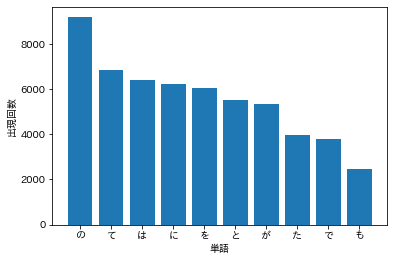

In [ ]:
!pip install japanize-matplotlib
 
import japanize_matplotlib
import matplotlib.pyplot as plt

word, count = zip(*cnt.most_common(10)) # zipの引数に * をつけると、要素をunzipできる
 
plt.bar(word, count)
plt.xlabel("単語")
plt.ylabel("出現回数")
plt.show()

37.「猫」と共起頻度の高い上位10語

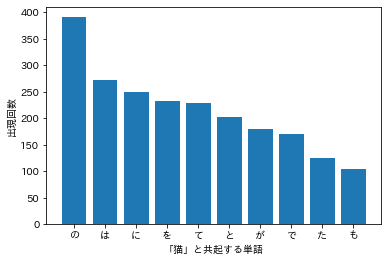

In [ ]:
result = []
sentence = []
 
with open("neko.txt.mecab") as f:
  for line in f:
        if line != 'EOS\n':
            list1 = line.split("\t") # 表層系とそれ以外に分割
            if len(list1) == 2:
                list2 = list1[1].split(",")
                sentence.append({"surface": list1[0], "base": list2[6], "pos": list2[0], "pos1": list2[1]})
        else:
            result.append(sentence)
            sentence = []

# ここまで問30と同じ

cat = []

for sentence in result:
    cnt = 0
    for word in sentence:
        if word["base"] == "猫":
            cnt += 1
    if cnt >= 1:
        for word in sentence:
            if word["pos"] != "記号" and word["base"] != "猫":
                cat.append(word["surface"])

cnt = Counter(cat) # キーに要素、値に出現回数という形のデータを生成

word, count = zip(*cnt.most_common(10)) # zipの引数に * をつけると、要素をunzipできる
 
plt.bar(word, count)
plt.xlabel("「猫」と共起する単語")
plt.ylabel("出現回数")
plt.show()

38.ヒストグラム

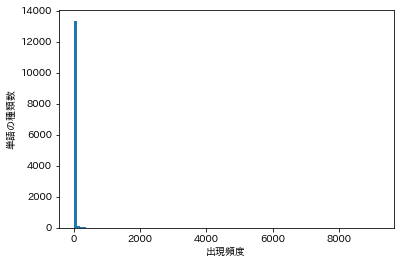

In [ ]:
result = []
sentence = []
 
with open("neko.txt.mecab") as f:
  for line in f:
        if line != 'EOS\n':
            list1 = line.split("\t") # 表層系とそれ以外に分割
            if len(list1) == 2:
                list2 = list1[1].split(",")
                sentence.append({"surface": list1[0], "base": list2[6], "pos": list2[0], "pos1": list2[1]})
        else:
            result.append(sentence)
            sentence = []

# ここまで問30と同じ

freq = []

for sentence in result:
    for word in sentence:
        if word["pos"] != "記号":
            freq.append(word["surface"])

cnt = Counter(freq) # キーに要素、値に出現回数という形のデータを生成
hist = cnt.values()

plt.hist(hist, bins=(100))
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

39.Zipfの法則

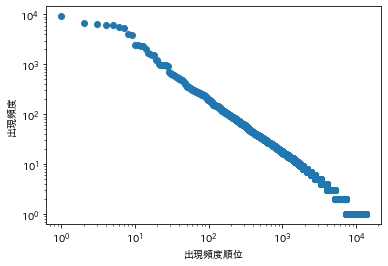

In [ ]:
result = []
sentence = []
 
with open("neko.txt.mecab") as f:
  for line in f:
        if line != 'EOS\n':
            list1 = line.split("\t") # 表層系とそれ以外に分割
            if len(list1) == 2:
                list2 = list1[1].split(",")
                sentence.append({"surface": list1[0], "base": list2[6], "pos": list2[0], "pos1": list2[1]})
        else:
            result.append(sentence)
            sentence = []

# ここまで問30と同じ

freq = []

for sentence in result:
    for word in sentence:
        if word["pos"] != "記号":
            freq.append(word["surface"])

cnt = Counter(freq) # キーに要素、値に出現回数という形のデータを生成

word, count = zip(*cnt.most_common()) # zipの引数に * をつけると、要素をunzipできる
 
y = count
x = [i + 1 for i in range(len(y))]

plt.scatter(x, y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()